# Preparación de datos


In [80]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [81]:
# Cargamos dataset de datos de zalando
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [82]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [83]:
print("***** ANTES *****")
print("Tipo de datos -train-", train_images.dtype) # Tipo de unidad que tenemos actualmente
print("Tipo de datos -test-", test_images.dtype) 

print("\n***** DESPUES *****")
# Escalamos los valores de entrada en el rango 0-1
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255
print("Tipo de datos -train-", train_images.dtype) 
print("Tipo de datos -test-", test_images.dtype) 

***** ANTES *****
Tipo de datos -train- uint8
Tipo de datos -test- uint8

***** DESPUES *****
Tipo de datos -train- float32
Tipo de datos -test- float32


In [84]:
# Vamos a ver como están puestas las etiquetas para ver la classe que son
print(train_labels)

[9 0 0 ... 3 0 5]


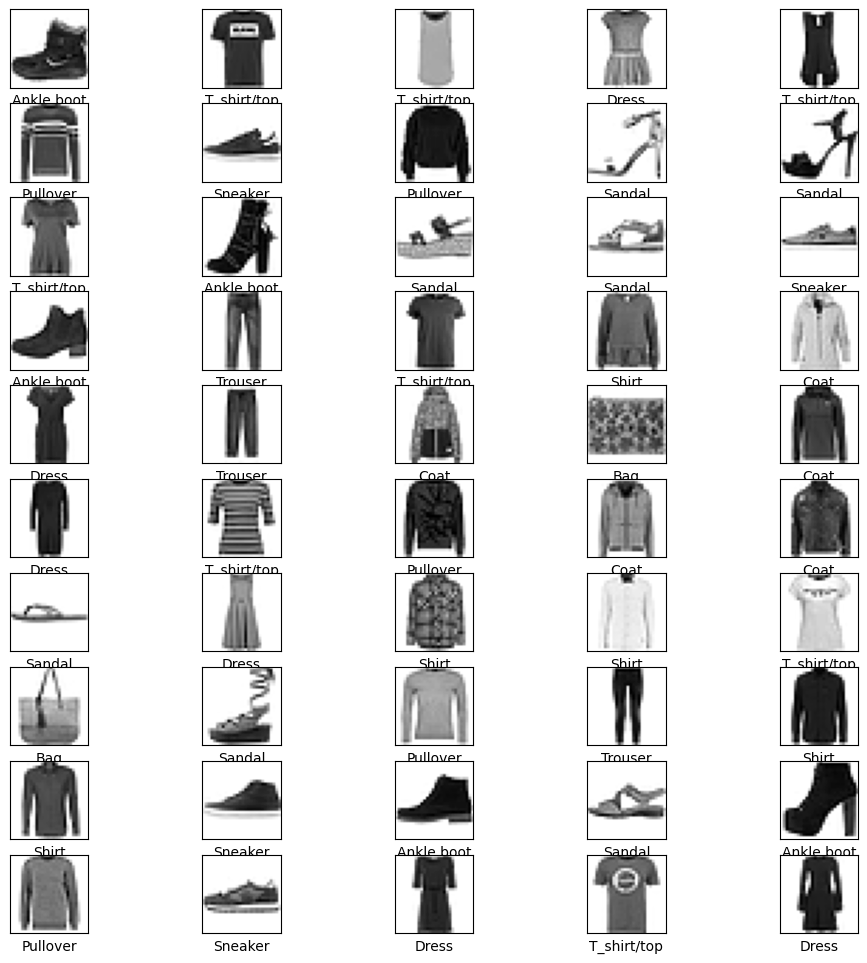

In [85]:
# Vemos que las etiquetas están como números, por eso vamos a 
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(12, 12))
for i in range(50):
  plt.subplot(10, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

# Definicion del modelo

In [86]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                7850      
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
None


In [87]:
# Configuramos el modelo
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("\nTest accuracy :", test_acc)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8363 - accuracy: 0.4655
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2441 - accuracy: 0.6514
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9764 - accuracy: 0.6946
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8497 - accuracy: 0.7281
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.7572 - accuracy: 0.7511

Test accuracy : 0.7511000037193298


In [88]:
# Pedriciones con el modelo
predictions = model.predict(test_images) # Aquí tenemos guardadas todas las predicciones
print(predictions[5])


313/313 [==============================] - 0s 1ms/step
[0.0094733  0.7675106  0.02599184 0.08502018 0.07412298 0.00272168
 0.01585394 0.01281263 0.00387119 0.00262173]


0.7675106
1
Classe predicha : Trouser


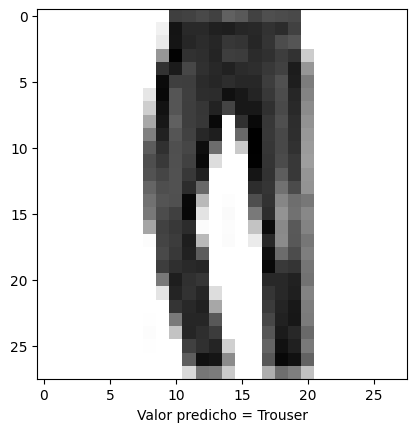

In [89]:
# Podemos ver que las predicciones nos da una probabilidad, para sacar el valor 
# que toca utilizaremos las funciones, max y argmax
print(np.max(predictions[5])) # Devuelve el valor más alto
print(np.argmax(predictions[5])) # Devuelve el índice del valor más alto
print('Classe predicha :', class_names[np.argmax(predictions[5])])  

# Vemos la imagen 5 del test
plt.imshow(test_images[5], cmap=plt.cm.binary)
plt.xlabel('Valor predicho = {}'.format(class_names[np.argmax(predictions[5])]) )
plt.show()

De esta manera, podemos ver como un modelo predice y mostramos lo que predice.

# Evaluación y mejora del modelo

In [90]:
# Codigo extraido de 'https://www.tensorflow.org/tutorials/keras/classification?hl=es-419'

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# i value to see
def plot_image_plus_array_value(i):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()

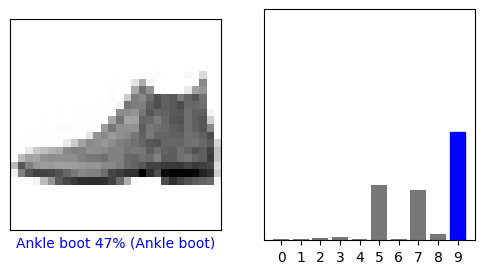

In [91]:
plot_image_plus_array_value(0)

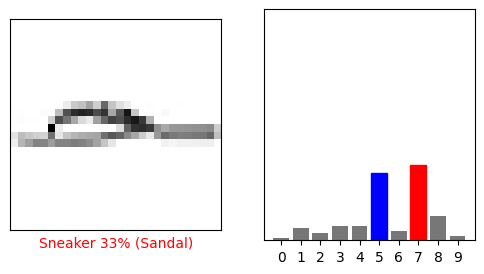

In [92]:
plot_image_plus_array_value(8)

Mejoramos el modelo

In [93]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

# Configuramos el modelo
model.compile(optimizer='adam', # Cambiamos el optimizador al optimizador ADAM
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)


print("\nTest Accuracy: ", test_acc)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0462 - accuracy: 0.7119
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5704 - accuracy: 0.8193
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4805 - accuracy: 0.8409
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4407 - accuracy: 0.8487
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4562 - accuracy: 0.8394

Test Accuracy:  0.8393999934196472


Finalmente, podemos ver que hemos mejorado bastante nuestro simplemente cambiando el optimizador a 'adam'. 